In [1]:
from etherscan.accounts import Account 
import json, requests
import argparse
import sys
import csv
import datetime, dateutil.parser
import pandas as pd
from tqdm import tqdm
import time
import random
import matplotlib.pyplot as plt
import datetime

## Ponzi contracts

In [2]:
#Opening and merging the different data
ponzi1 =pd.read_csv("ponzis.txt", header = None).rename({0:'address', 1:'name'}, axis = 1)
ponzi1 = ponzi1['address'].tolist()
ponzi2 = pd.read_csv("Ponzi_label.csv")
ponzi2 = ponzi2[ponzi2['Ponzi']=='1']['Contract'].tolist()
ponzi3 = pd.read_csv("PonziDataset_20221114.csv")
ponzi3=ponzi3[['address','label']]
ponzi3=ponzi3[ponzi3['label']==1]['address'].tolist()
ponzi_addresses = list(set(ponzi1+ponzi2+ponzi3))
len(ponzi_addresses)

495

In [ ]:
key = ""
internal = pd.DataFrame()
external = pd.DataFrame()
ponzi_names = ['new'+str(i) for i in range(len(ponzi_addresses))]
for i in tqdm(range(len(ponzi_addresses))):
    api = Account(address=ponzi_addresses[i], api_key=key)
    #Gathering internal transactions
    flag = True
    current = 1
    while flag == True:
        try:
            ints = api.get_transaction_page(page=current, offset=10000, internal = True)
            current+=1
            internal_current = pd.DataFrame(ints)
            internal_current['ponzi_name']=ponzi_names[i]
            internal = pd.concat([internal, internal_current], axis = 0)
            time.sleep(0.5+random.random())
        except:
            flag = False
            internal.to_csv('internal_transactions.csv', index = False)
    time.sleep(1+random.random())
    #Gathering external transactions
    flag = True
    current = 1
    while flag == True:
        try:
            exts = api.get_transaction_page(page=current, offset=10000, internal = False)
            current+=1
            external_current = pd.DataFrame(exts)
            external_current['ponzi_name']=ponzi_names[i]
            external = pd.concat([external, external_current], axis = 0)
            time.sleep(0.5+random.random())
        except:
            flag = False
            external.to_csv('external_transactions.csv', index = False)
    time.sleep(2+random.random()*3)

100%|██████████| 495/495 [1:17:00<00:00,  9.33s/it]


In [ ]:
external = pd.read_csv("external_transactions.csv")
internal = pd.read_csv("internal_transactions.csv")
#transforming values to integers
external['value'] = external['value'].astype(float)/10**18
internal['value'] = internal['value'].astype(float)/10**18

C:\Users\fabio\AppData\Local\Temp\ipykernel_20316\3028406549.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  external = pd.read_csv("external_transactions.csv")


## Non-Ponzi contracts

In [2]:
#Opening and merging the different data
nonponzi1 = pd.read_csv("Ponzi_label.csv")
nonponzi1 = nonponzi1[nonponzi1['Ponzi']=='0']['Contract'].str.lower().tolist()
nonponzi2 = pd.read_csv("PonziDataset_20221114.csv")
nonponzi2=nonponzi2[['address','label']]
nonponzi2=nonponzi2[nonponzi2['label']==0]['address'].str.lower().tolist()
nonponzi_addresses = list(set(nonponzi1+nonponzi2))
len(nonponzi_addresses)

6187

In [25]:
key = "B3FVIJH8RGVUCMGP6MVU5JUZDX2W4EB1MG"
internal = pd.DataFrame()
external = pd.DataFrame()
nponzi_names = ['np'+str(i) for i in range(len(nonponzi_addresses))]
for i in tqdm(range(len(nonponzi_addresses))):
    api = Account(address=nonponzi_addresses[i], api_key=key)
    #Gathering internal transactions
    flag = True
    current = 1
    while flag == True:
        try:
            ints = api.get_transaction_page(page=current, offset=10000, internal = True)
            current+=1
            internal_current = pd.DataFrame(ints)
            internal_current['ponzi_name']=nponzi_names[i]
            internal = pd.concat([internal, internal_current], axis = 0)
            time.sleep(0.5+random.random())
        except:
            flag = False
            internal.to_csv('np_internal_transactions4.csv', index = False)
    time.sleep(1+random.random())
    #Gathering external transactions
    flag = True
    current = 1
    while flag == True:
        try:
            exts = api.get_transaction_page(page=current, offset=10000, internal = False)
            current+=1
            external_current = pd.DataFrame(exts)
            external_current['ponzi_name']=nponzi_names[i]
            external = pd.concat([external, external_current], axis = 0)
            time.sleep(0.5+random.random())
        except:
            flag = False
            external.to_csv('np_external_transactions4.csv', index = False)
    time.sleep(2+random.random()*3)

  0%|          | 13/6187 [00:39<5:15:20,  3.06s/it]


## Cleaning the data

In [31]:
external = pd.read_csv("external_transactions.csv")
internal = pd.read_csv("internal_transactions.csv")
#transforming values to integers
external['value'] = external['value'].astype(float)/10**18
internal['value'] = internal['value'].astype(float)/10**18
external['transaction_cost'] = external['gasPrice']*external['gasUsed'] / 10**18 #transaction fee in ETH

C:\Users\fabio\AppData\Local\Temp\ipykernel_2196\3714707201.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  external = pd.read_csv("external_transactions.csv")


In [32]:
np_external = pd.read_csv("np_external_transactions.csv")
np_internal = pd.read_csv("np_internal_transactions.csv")

np_external2 = pd.read_csv("np_external_transactions2.csv")
np_internal2 = pd.read_csv("np_internal_transactions2.csv")

np_internal = pd.concat([np_internal, np_internal2], axis = 0)
np_external = pd.concat([np_external, np_external2], axis = 0)

np_external2 = pd.read_csv("np_external_transactions3.csv")
np_internal2 = pd.read_csv("np_internal_transactions3.csv")

np_internal = pd.concat([np_internal, np_internal2], axis = 0)
np_external = pd.concat([np_external, np_external2], axis = 0)

np_external2 = pd.read_csv("np_external_transactions4.csv")
np_internal2 = pd.read_csv("np_internal_transactions4.csv")

np_internal = pd.concat([np_internal, np_internal2], axis = 0).reset_index(drop=True)
np_external = pd.concat([np_external, np_external2], axis = 0).reset_index(drop=True)

np_external['value'] = np_external['value'].astype(float)/10**18
np_internal['value'] = np_internal['value'].astype(float)/10**18
np_external['transaction_cost'] = np_external['gasPrice']*np_external['gasUsed'] / 10**18

C:\Users\fabio\AppData\Local\Temp\ipykernel_2196\1469717982.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  np_external = pd.read_csv("np_external_transactions.csv")
C:\Users\fabio\AppData\Local\Temp\ipykernel_2196\1469717982.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  np_external2 = pd.read_csv("np_external_transactions3.csv")


In [33]:
external['Date']=0
for i in range(len(external)):
    external.loc[i, 'Date']=datetime.datetime.fromtimestamp(int(external.loc[i, 'timeStamp'])-6000)

internal['Date']=0
for i in range(len(internal)):
    internal.loc[i, 'Date']=datetime.datetime.fromtimestamp(int(internal.loc[i, 'timeStamp'])-6000)

In [34]:
np_external['Date']=0
for i in range(len(np_external)):
    np_external.loc[i, 'Date']=datetime.datetime.fromtimestamp(int(np_external.loc[i, 'timeStamp'])-6000)

np_internal['Date']=0
for i in range(len(np_internal)):
    np_internal.loc[i, 'Date']=datetime.datetime.fromtimestamp(int(np_internal.loc[i, 'timeStamp'])-6000)

In [2]:
eth_to_usd1 = pd.read_csv('eth_to_usd.txt').rename({'Date(UTC)':'Date'}, axis=1)[['Date', 'Value']]
eth_to_usd1['Date_conv'] = [datetime.datetime.strptime(i, '%m/%d/%Y') for i in eth_to_usd1['Date']]

eth_to_usd2 = pd.read_csv('ETH-USD.csv').rename({'Close':'Value'}, axis=1)
eth_to_usd2['Date_conv'] = [datetime.datetime.strptime(i, '%d-%m-%y') for i in eth_to_usd2['Date']]

eth_to_usd = pd.concat([eth_to_usd1[eth_to_usd1['Date_conv']< min(eth_to_usd2['Date_conv'])],eth_to_usd2],axis=0)[['Date_conv', 'Value']].rename({'Value':'Conversion'}, axis=1)

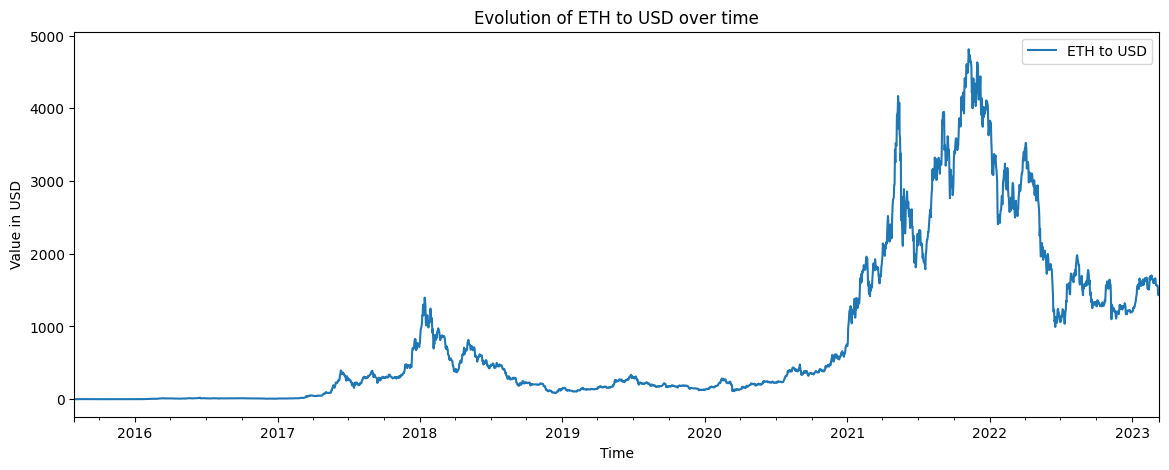

In [5]:
fig, ax = plt.subplots(figsize=(14,5))
eth_to_usd.plot.line(x='Date_conv', y='Conversion', label='ETH to USD', ax=ax)
ax.set_ylabel('Value in USD')
ax.set_xlabel('Time')
ax.set_title('Evolution of ETH to USD over time')
plt.show()

In [36]:
#Converting ETH to USD
external['Date_merge']=[datetime.datetime.strptime(str(i.date()), '%Y-%m-%d') for i in external['Date']]
external = pd.merge(external, eth_to_usd, left_on='Date_merge', right_on='Date_conv').drop(['Date_merge'], axis=1)
external['Value_usd']=external['value']*external['Conversion']
external['Transaction_cost_usd']=external['transaction_cost']*external['Conversion']
external=external.drop(['Date_conv', 'Conversion'], axis=1)

internal['Date_merge']=[datetime.datetime.strptime(str(i.date()), '%Y-%m-%d') for i in internal['Date']]
internal = pd.merge(internal, eth_to_usd, left_on='Date_merge', right_on='Date_conv').drop(['Date_merge'], axis=1)
internal['Value_usd']=internal['value']*internal['Conversion']
internal=internal.drop(['Date_conv', 'Conversion'], axis=1)

external['from']=external['from'].str.lower()
external['to']=external['to'].str.lower()
internal['from']=internal['from'].str.lower()
internal['to']=internal['to'].str.lower()

np_internal['Date_merge']=[datetime.datetime.strptime(str(i.date()), '%Y-%m-%d') for i in np_internal['Date']]
np_internal = pd.merge(np_internal, eth_to_usd, left_on='Date_merge', right_on='Date_conv').drop(['Date_merge'], axis=1)
np_internal['Value_usd']=np_internal['value']*np_internal['Conversion']
np_internal=np_internal.drop(['Date_conv', 'Conversion'], axis=1)

np_external['Date_merge']=[datetime.datetime.strptime(str(i.date()), '%Y-%m-%d') for i in np_external['Date']]
np_external = pd.merge(np_external, eth_to_usd, left_on='Date_merge', right_on='Date_conv').drop(['Date_merge'], axis=1)
np_external['Value_usd']=np_external['value']*np_external['Conversion']
np_external['Transaction_cost_usd']=np_external['transaction_cost']*np_external['Conversion']
np_external=np_external.drop(['Date_conv', 'Conversion'], axis=1)

np_external['from']=np_external['from'].str.lower()
np_external['to']=np_external['to'].str.lower()
np_internal['from']=np_internal['from'].str.lower()
np_internal['to']=np_internal['to'].str.lower()

In [37]:
#Saving the cleaned data
external.to_csv('all_external.csv', index=False)
internal.to_csv('all_internal.csv', index=False)
np_external.to_csv('all_np_external.csv', index=False)
np_internal.to_csv('all_np_internal.csv', index=False)

## Network visualization

In [2]:
import networkx as nx

In [3]:
all_ponzi_transactions = pd.read_csv('all_ponzi_transactions_cleaned.csv')
all_ponzi_transactions.groupby('contract_address')[['from']].count()

,from
contract_address,
0x00efd61b0d94ccd82f3922d26efdd3ed9859081a,260
0x029d0650c81817afb1810ae10270823318321878,3577
0x02b2101903eb6a51518e63e84b785180859fda9d,42
0x0389a06b028526b05966c287370bebefa0082176,206
0x04129cff7d79a652256c73b1407f34828e79a4de,32
...,...
0xfdfcfa5dce03a67fde31d674784312bed25f0b90,188
0xfe3672eff595cfd36ed05aaf4622d1aec3b5e852,34
0xfe9c69945687539fabbf531133838d9cce522a76,190


### FastRealisticPyramid

In [4]:
FastRealisticPyramid = all_ponzi_transactions[all_ponzi_transactions['contract_address']=='0xfe3672eff595cfd36ed05aaf4622d1aec3b5e852'].reset_index(drop=True)
FastRealisticPyramid=FastRealisticPyramid.sort_values('Date')
set(FastRealisticPyramid['age_days'])

{0, 1, 4, 592, 774, 883, 1033}

In [5]:
dict_mapping = {'0xab092d201ccdbd22a08c13e717841d09bf61fb84':'creator',
 '0xfe3672eff595cfd36ed05aaf4622d1aec3b5e852':'contract', 
 '0x2ff080a723010c7ddbd923f50a1083f93173030c':'1st user',
 '0xb3e3429824d31ba87edea73fac823a67f44c6015':'2nd user'}

C:\Users\fabio\AppData\Local\Temp\ipykernel_34232\272827386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Value_usd']=temp_df['Value_usd'].round(2)
C:\Users\fabio\AppData\Local\Temp\ipykernel_34232\272827386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['from']=temp_df['from'].map(dict_mapping)
C:\Users\fabio\AppData\Local\Temp\ipykernel_34232\272827386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

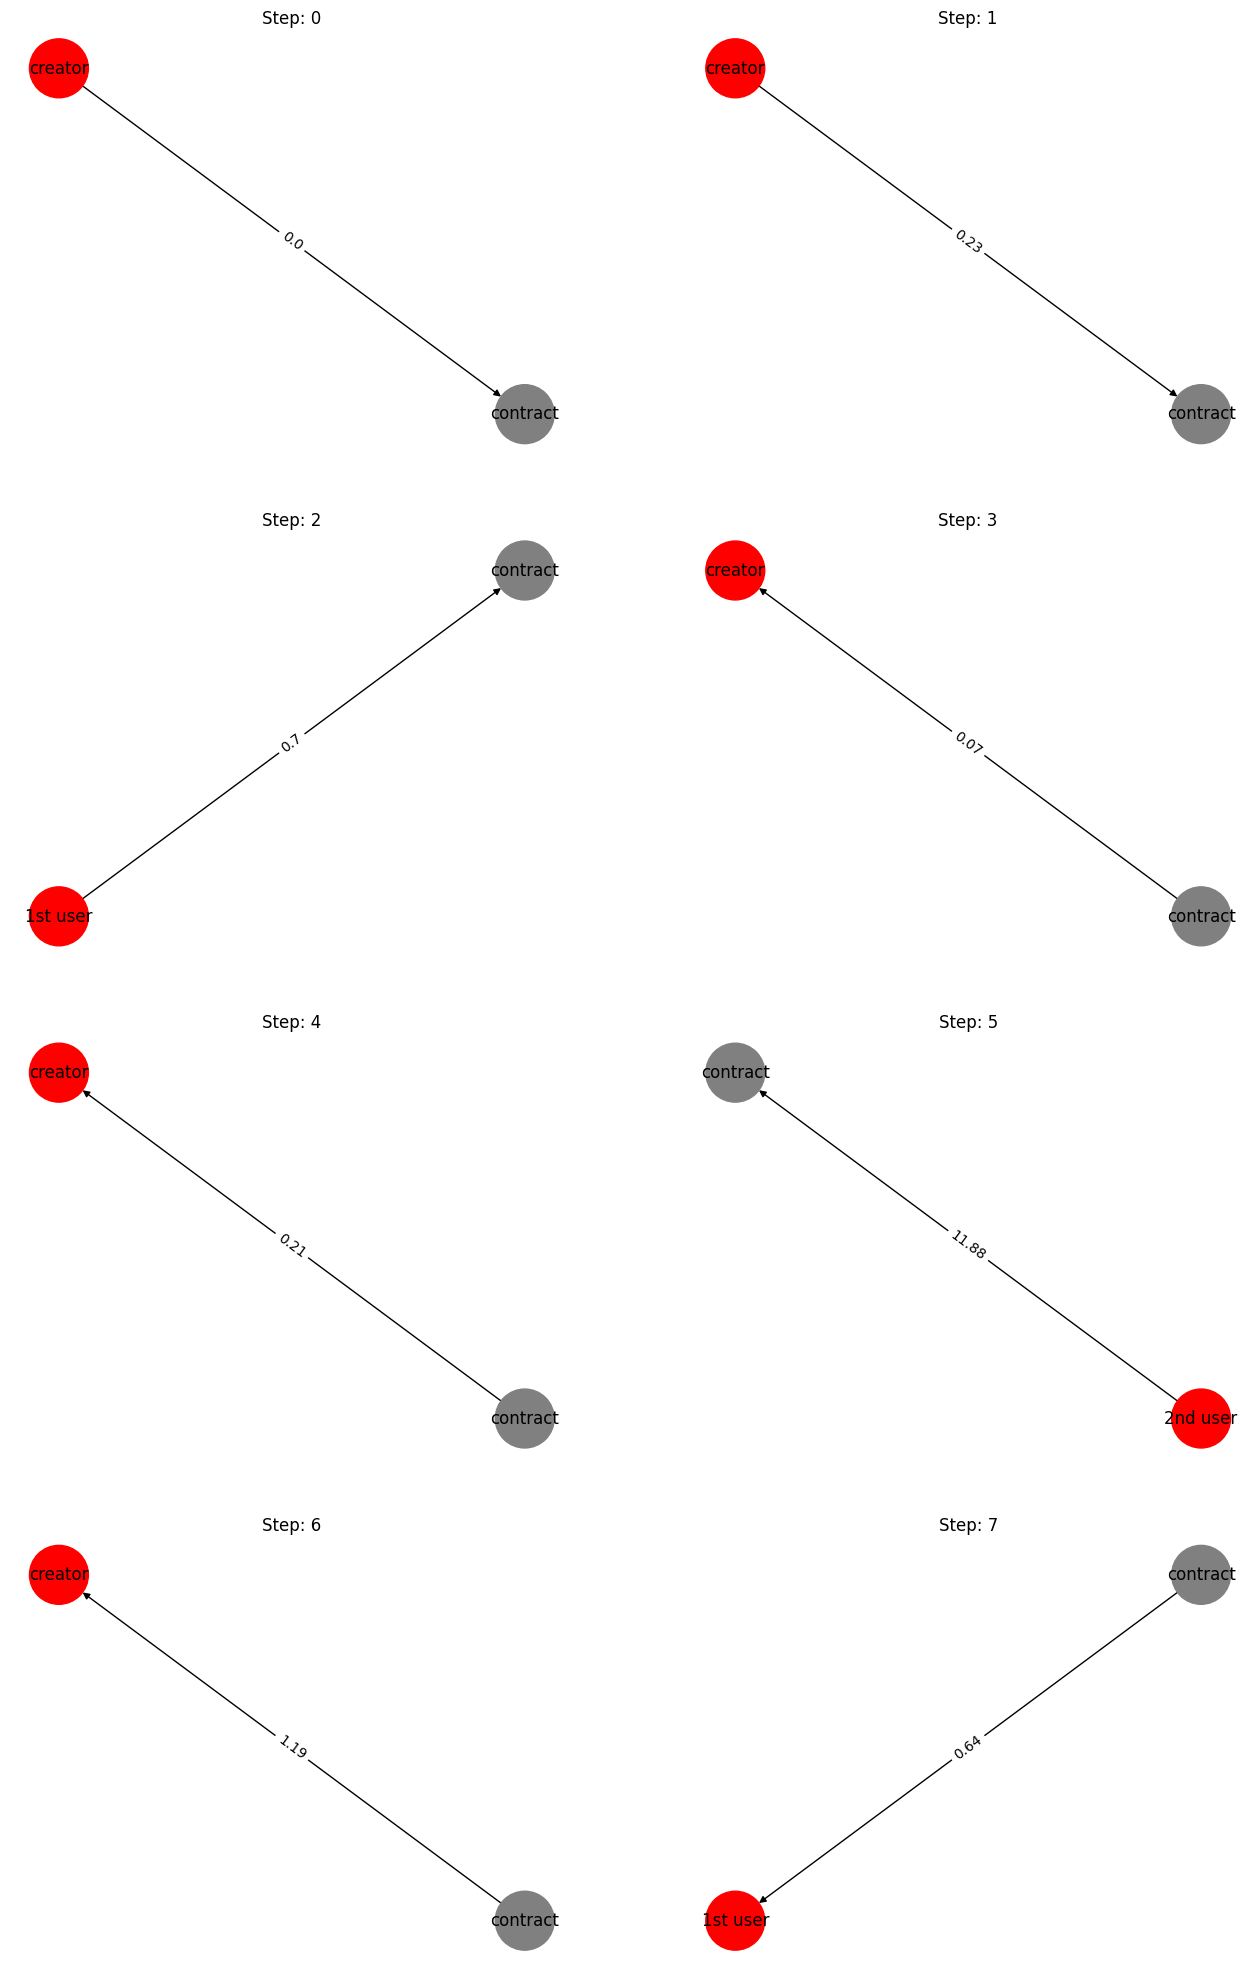

In [6]:
temp_df = FastRealisticPyramid[FastRealisticPyramid['age_days']==0]
temp_df['Value_usd']=temp_df['Value_usd'].round(2)
temp_df['from']=temp_df['from'].map(dict_mapping)
temp_df['to']=temp_df['to'].map(dict_mapping)
G = nx.from_pandas_edgelist(temp_df,'from','to', edge_attr='Value_usd', create_using=nx.DiGraph())
pos = nx.spring_layout(G)
fig, axs = plt.subplots(nrows=4, ncols=2,figsize=(16,25))
axs=axs.ravel()
for i in range(len(temp_df)):
    td = temp_df.loc[i:i]
    ax=axs[i]
    G = nx.from_pandas_edgelist(td,'from','to', edge_attr='Value_usd', create_using=nx.DiGraph())
    edge_labels = nx.get_edge_attributes(G,'Value_usd')
    color_map = []
    for node in G:
        if node =='contract':
            color_map.append('gray')
        else: 
            color_map.append('red')
    nx.draw(G, ax = ax, pos=pos, with_labels=True, node_color=color_map, node_size=1800)
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels,ax=ax)
    ax.set_title(f'Step: {i}')
plt.show()

C:\Users\fabio\AppData\Local\Temp\ipykernel_18828\2930602300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Value_usd']=temp_df['Value_usd'].round(2)
C:\Users\fabio\AppData\Local\Temp\ipykernel_18828\2930602300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['from']=temp_df['from'].map(dict_mapping)
C:\Users\fabio\AppData\Local\Temp\ipykernel_18828\2930602300.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

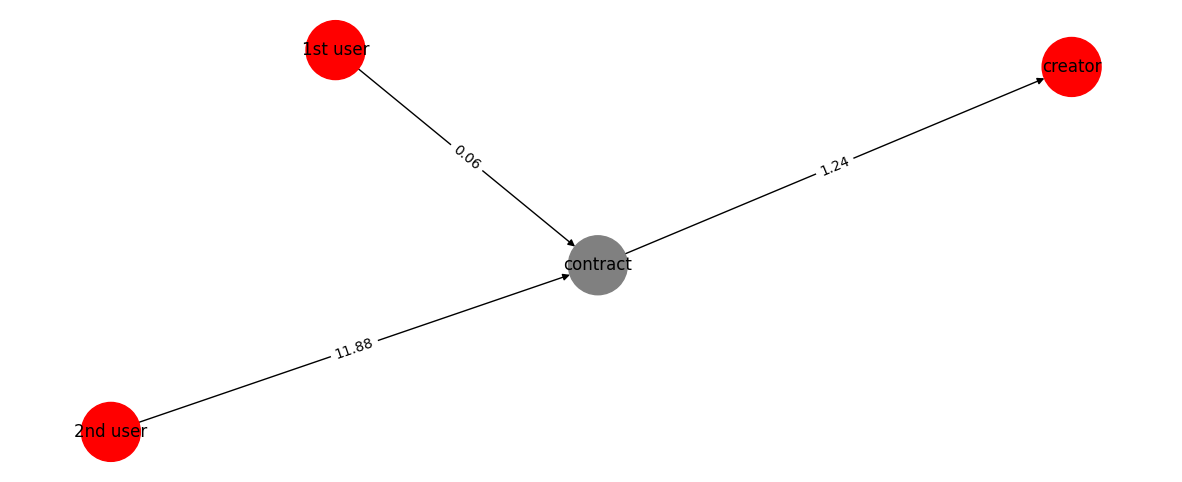

In [122]:
import numpy as np
temp_df = FastRealisticPyramid[FastRealisticPyramid['age_days']==0]
temp_df['Value_usd']=temp_df['Value_usd'].round(2)
temp_df['from']=temp_df['from'].map(dict_mapping)
temp_df['to']=temp_df['to'].map(dict_mapping)
new_dict  = {}
for i in ['creator', '1st user', '2nd user']:
    value = np.round(- temp_df[temp_df['from']==i]['Value_usd'].sum() + temp_df[temp_df['to']==i]['Value_usd'].sum(),2)
    if value>0:
        new_dict[('contract', i)]=value
    else:
        new_dict[(i, 'contract')]=-value

G = nx.DiGraph()
for i in list(new_dict.keys()):
    G.add_edge(i[0], i[1])
#G = nx.from_pandas_edgelist(temp_df,'from','to', edge_attr='Value_usd', create_using=nx.DiGraph())
pos = nx.spring_layout(G)
fig, ax = plt.subplots(figsize=(15,6))
#edge_labels = nx.get_edge_attributes(G,'Value_usd')
color_map = []
for node in G:
    if node =='contract':
        color_map.append('gray')
    else: 
        color_map.append('red')
nx.draw(G, ax = ax, pos=pos, with_labels=True, node_color=color_map, node_size=1800)
nx.draw_networkx_edge_labels(G, pos, edge_labels = new_dict,ax=ax)
plt.show()

### Plotting the entire scheme

In [4]:
all_data=pd.read_csv('all_cleaned_data.csv')
all_ponzi=all_data[all_data['is_ponzi']==1].reset_index(drop=True)

In [5]:
contract_nodes = all_ponzi.groupby('contract_address')[['from']].nunique().reset_index().rename({'from':'number of nodes'},axis=1).sort_values('number of nodes', ascending=False)
contract_nodes[contract_nodes['number of nodes']<=80].head()

,contract_address,number of nodes
90,0x67f41953b90966257c71f6f271572399dfbfe16d,79
19,0x1c98eea5fe5e15d77feeabc0dfcfad32314fd481,78
129,0xa2c4e011ef42a4eb5dc931a88797560bcb83aefe,72
188,0xd7cb65c907815d1852e246198aa7687e06d96e53,72
236,0xfe9c69945687539fabbf531133838d9cce522a76,68


In [6]:
def sign_calculator(row):
    if row['from']==row['user']:
        return -row['Value_usd']
    else:
        return row['Value_usd']
    
def determine_user(row):
    if row['from']==row['contract_address']:
        return row['to']
    else:
        return row['from']

In [7]:
all_ponzi[all_ponzi['contract_address']=='0xfe3672eff595cfd36ed05aaf4622d1aec3b5e852']['contract_name'].iloc[0]

'ZeroPonzi'

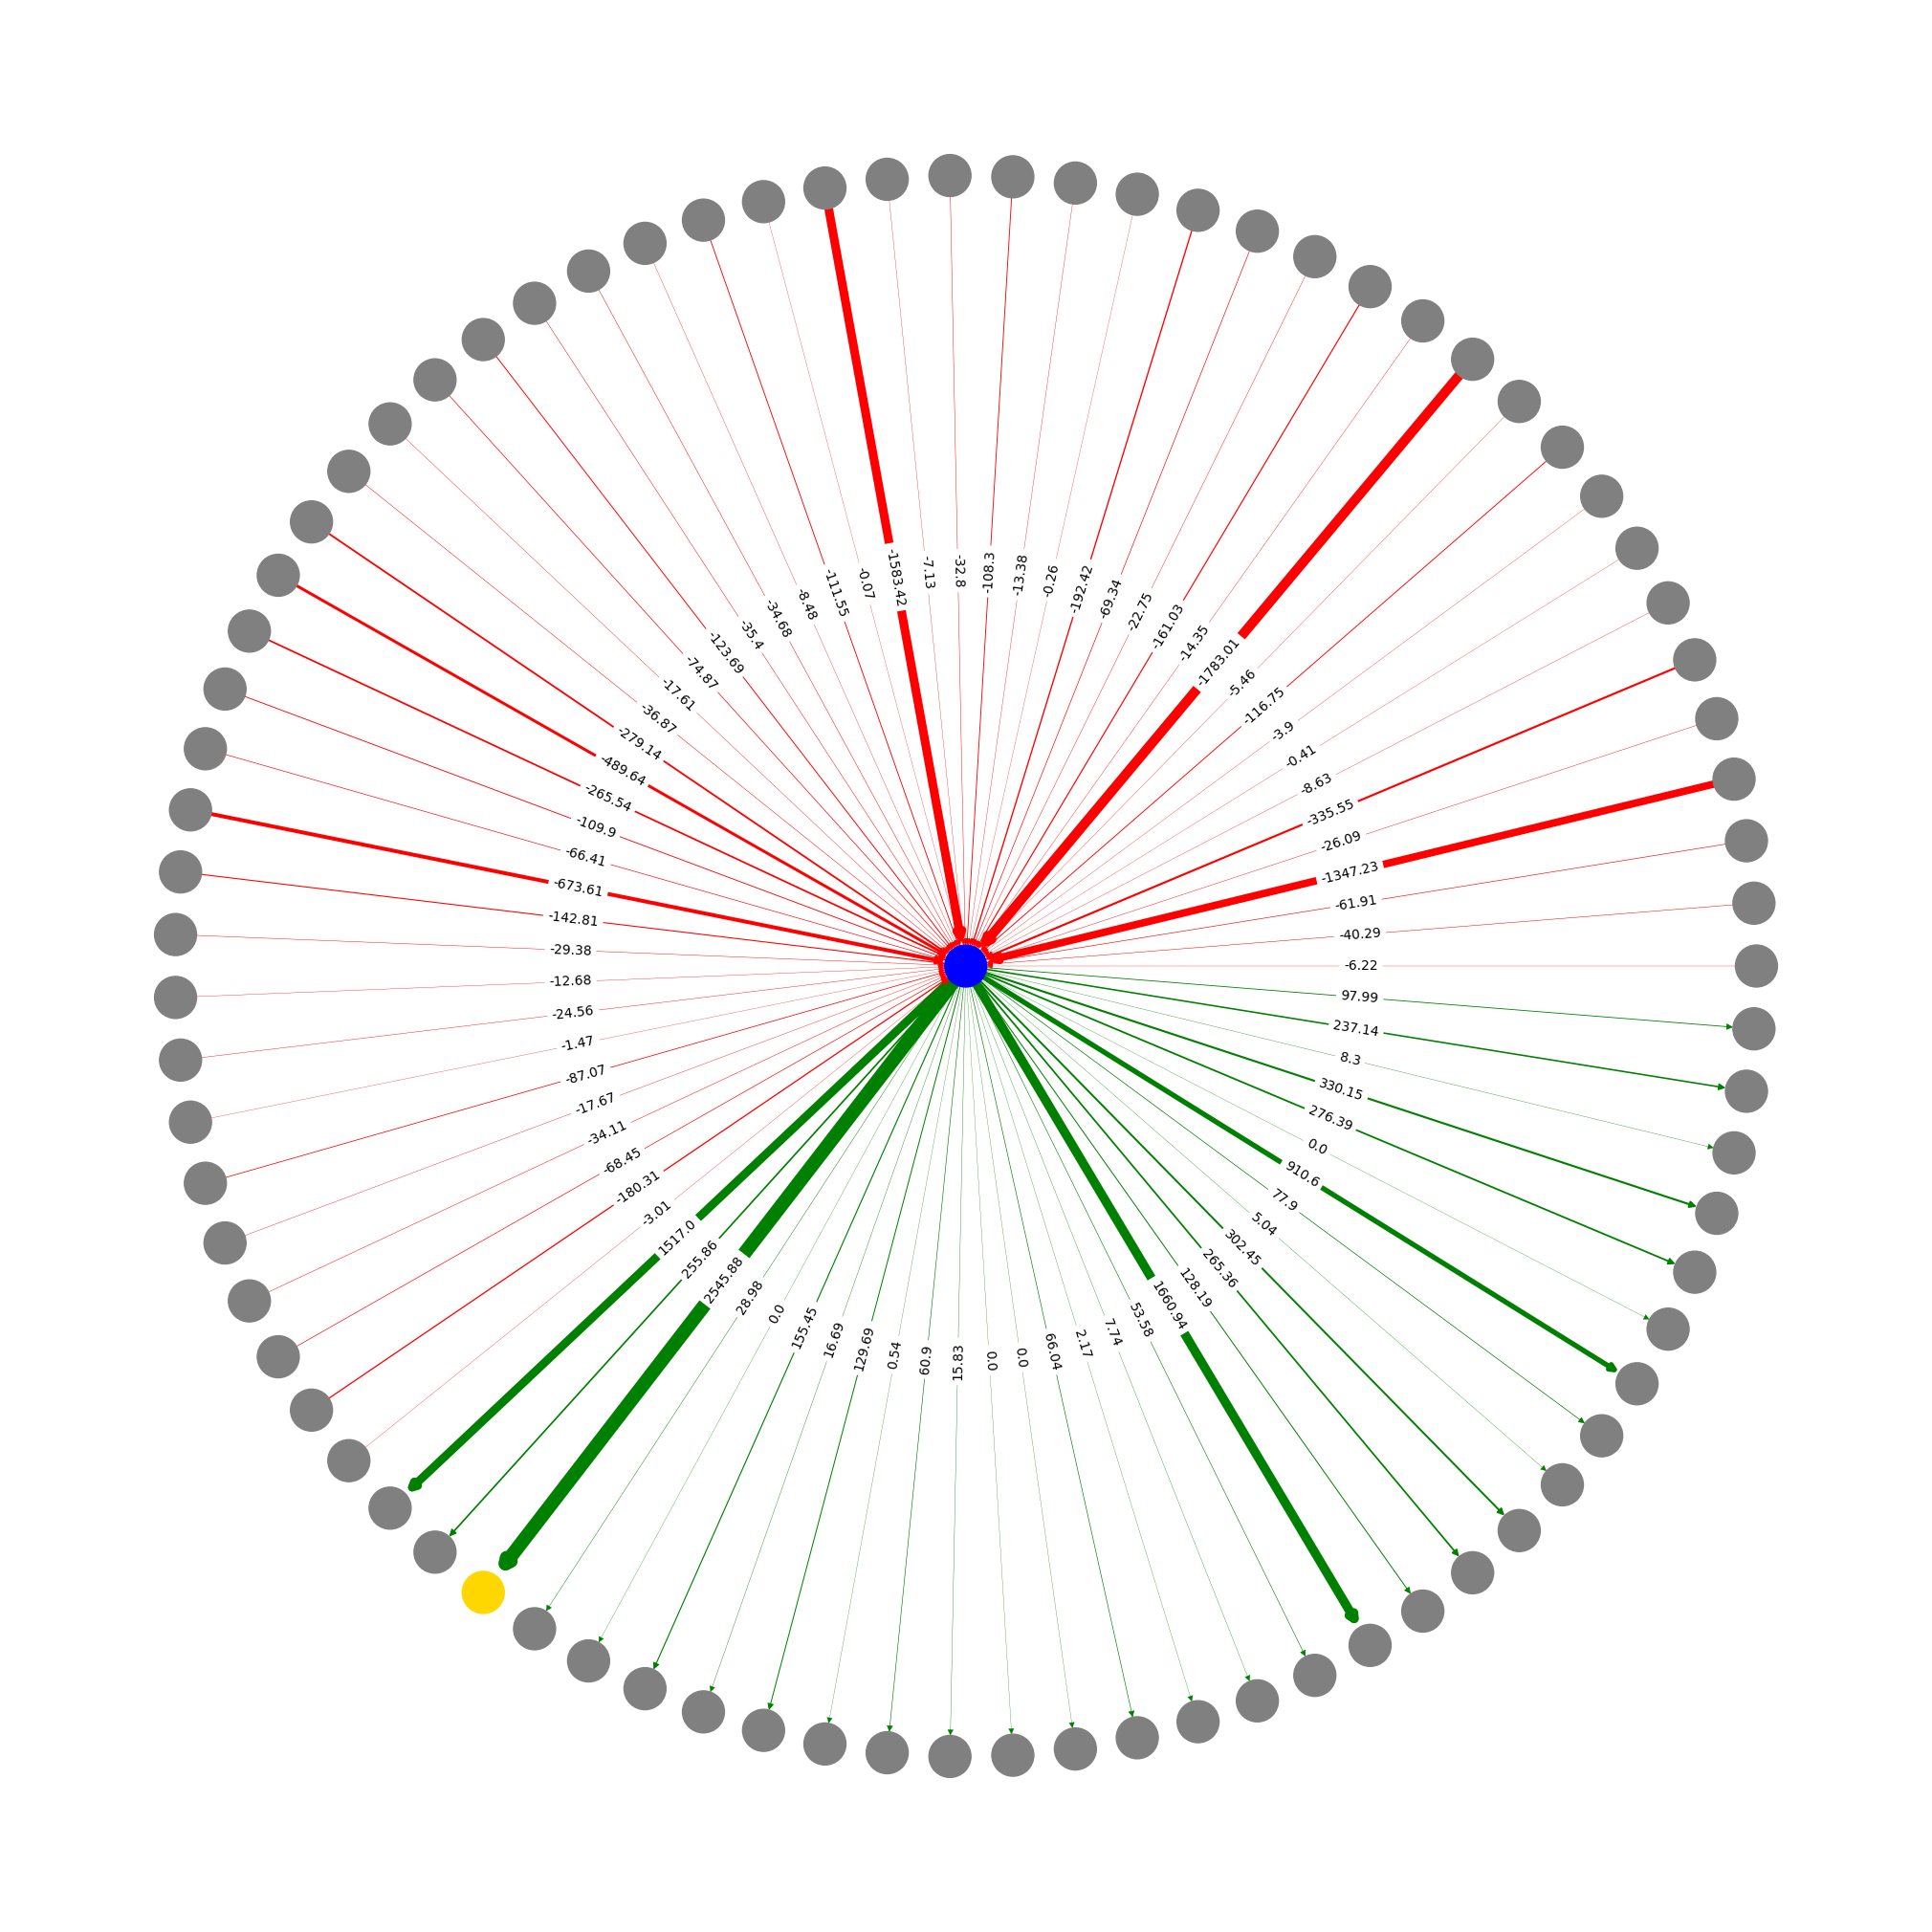

In [20]:
import numpy as np
ZeroPonzi = all_ponzi[all_ponzi['contract_address']=='0x67f41953b90966257c71f6f271572399dfbfe16d'].reset_index(drop=True)
ZeroPonzi['value_correct_sign'] = ZeroPonzi.apply(sign_calculator, axis=1)
ZeroPonzi['user']=ZeroPonzi.apply(determine_user, axis=1)

profits = ZeroPonzi.groupby('user')[['value_correct_sign']].sum().reset_index()
neg_vals=profits[profits['value_correct_sign']<0].reset_index(drop=True).rename({'user':'from'}, axis=1)
neg_vals['width']=np.abs(neg_vals['value_correct_sign'])
neg_vals['color']='red'
neg_vals['to']='0x67f41953b90966257c71f6f271572399dfbfe16d'
pos_vals=profits[profits['value_correct_sign']>=0].reset_index(drop=True).rename({'user':'to'}, axis=1)
pos_vals['color']='green'
pos_vals['width']=np.abs(pos_vals['value_correct_sign'])
pos_vals['from']='0x67f41953b90966257c71f6f271572399dfbfe16d'
graph_data = pd.concat([neg_vals, pos_vals])
graph_data['value_correct_sign']=graph_data['value_correct_sign'].round(2)

G = nx.from_pandas_edgelist(graph_data,'from','to', edge_attr=['value_correct_sign', 'color', 'width'], create_using=nx.DiGraph())
center_node = ZeroPonzi[['contract_address']].iloc[0][0]  
edge_nodes = set(G) - {center_node}
# Ensures the nodes around the circle are evenly distributed
pos = nx.circular_layout(G.subgraph(edge_nodes))
pos[center_node] = np.array([0, 0])  # manually specify node position
edge_color_list = [G[e[0]][e[1]]['color'] for e in G.edges() ]
widths = [G[e[0]][e[1]]['width']/250+0.2 for e in G.edges() ]
edge_labels = nx.get_edge_attributes(G,'value_correct_sign')
plt.figure(figsize=(20,20))
color_map = []
for node in G:
    if node ==ZeroPonzi.sort_values('age_minutes')[['user']].iloc[0][0]: #creator
        color_map.append('gold')
    elif node ==ZeroPonzi[['contract_address']].iloc[0][0]: #contract
        color_map.append('blue')
    else: 
        color_map.append('gray')
nx.draw(G, pos = pos,edge_color = edge_color_list , width = widths, node_color=color_map, node_size=1000)
#nx.draw_networkx_labels(G, pos = pos, font_size=10)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels = edge_labels)
#plt.savefig('weighted.png', bbox_inches = 'tight')
plt.show()